In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math
import datetime
import sys
import random 
import os

In [3]:
SEED = 2024
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] =str(seed)
    np.random.seed(seed)

seed_everything(SEED)

In [4]:
df_loan = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

In [5]:
df_loan.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
df_loan.shape

(58645, 13)

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
df_loan.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [9]:
df_loan['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [10]:
df_loan['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [11]:
df_loan['loan_status'].unique()

array([0, 1])

[]

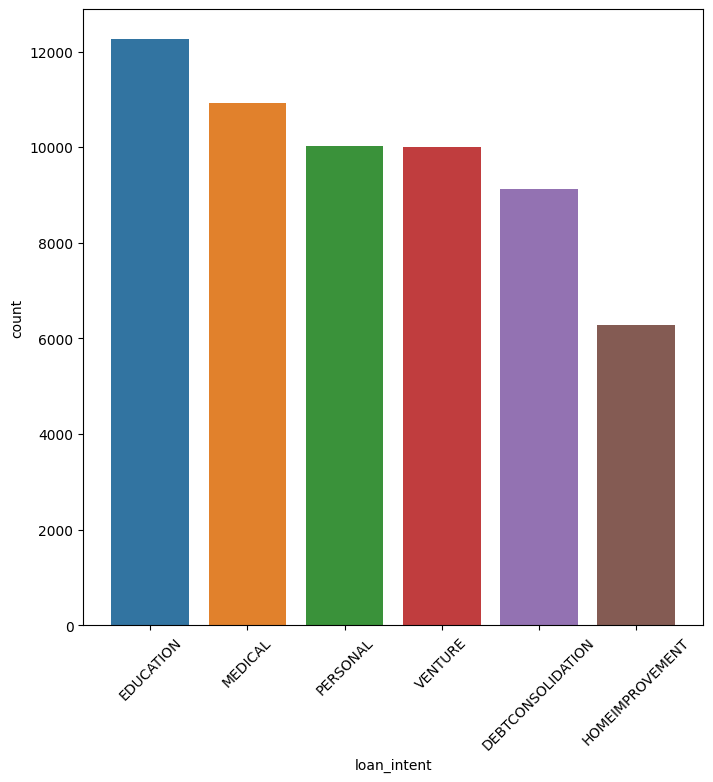

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='loan_intent',data=df_loan)
plt.xticks(rotation=45)
plt.plot()

[]

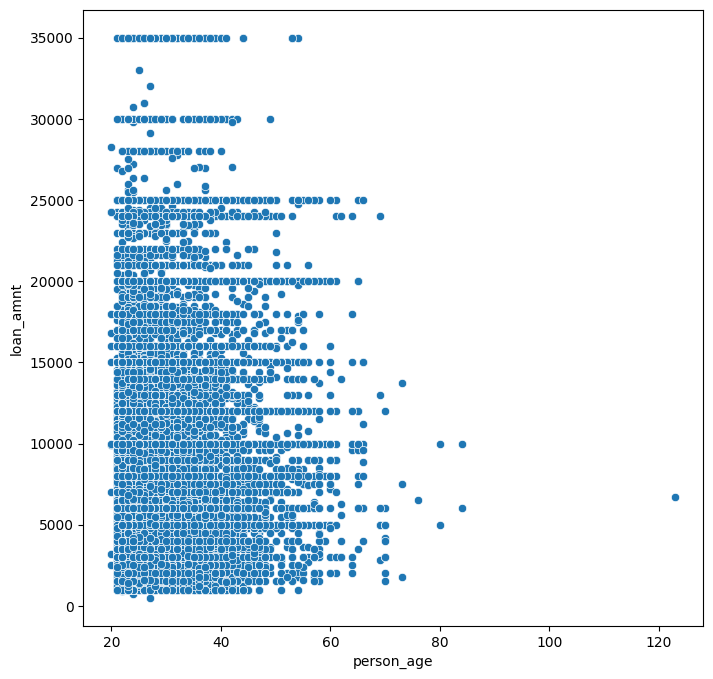

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='person_age',y='loan_amnt',data=df_loan)
plt.plot()

[]

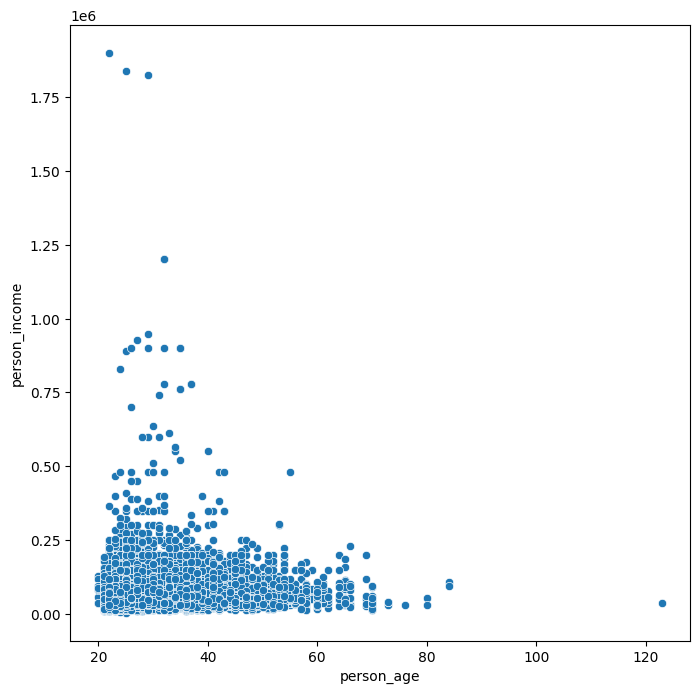

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='person_age',y='person_income',data=df_loan)
plt.plot()

In [15]:
df_loan_1 = df_loan[df_loan['loan_intent'] == 'personal']

In [16]:
df_loan_1 = df_loan[df_loan['person_income'] >= 200000]

In [17]:
df_loan_1.shape

(371, 13)

[]

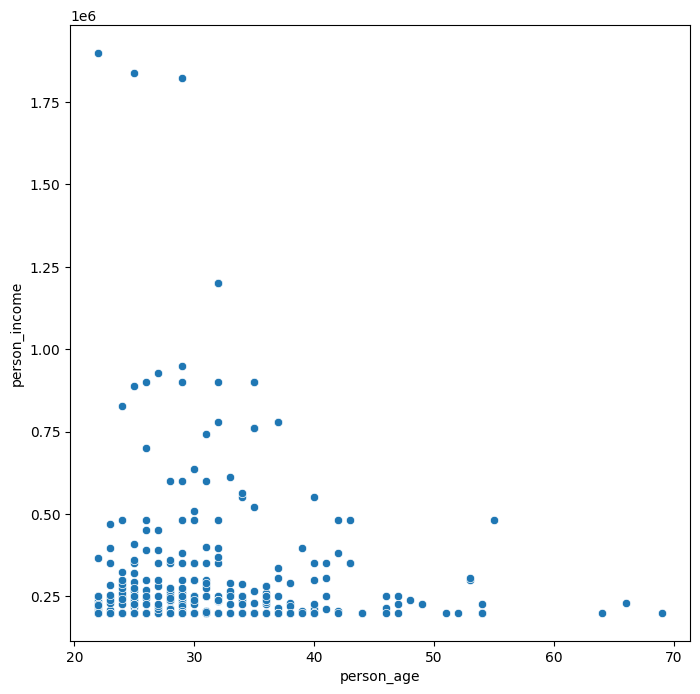

In [18]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='person_age',y='person_income',data=df_loan_1)
plt.plot()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


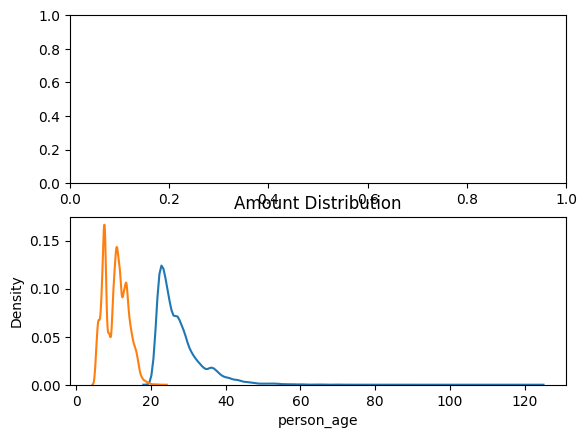

In [19]:
fig ,(ax0,ax1) =plt.subplots(2,1)
ax0 = sns.kdeplot(data=df_loan,x='person_age')
ax0.set_title('Age Distribution')

ax1 = sns.kdeplot(data=df_loan,x='loan_int_rate')
ax1.set_title('Amount Distribution')
plt.show()


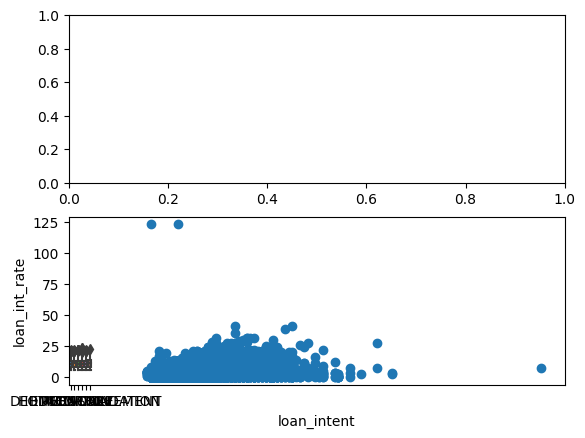

In [20]:
plt.subplots(2,1)

sns.boxplot(df_loan,x='loan_intent',y='loan_int_rate')
# plt.set_title('Loan Intent Vs Loan Interest Rate')

plt.scatter(x=df_loan['person_age'],y=df_loan['person_emp_length'])
# plt.set_title('person_age Vs person_emp_length')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

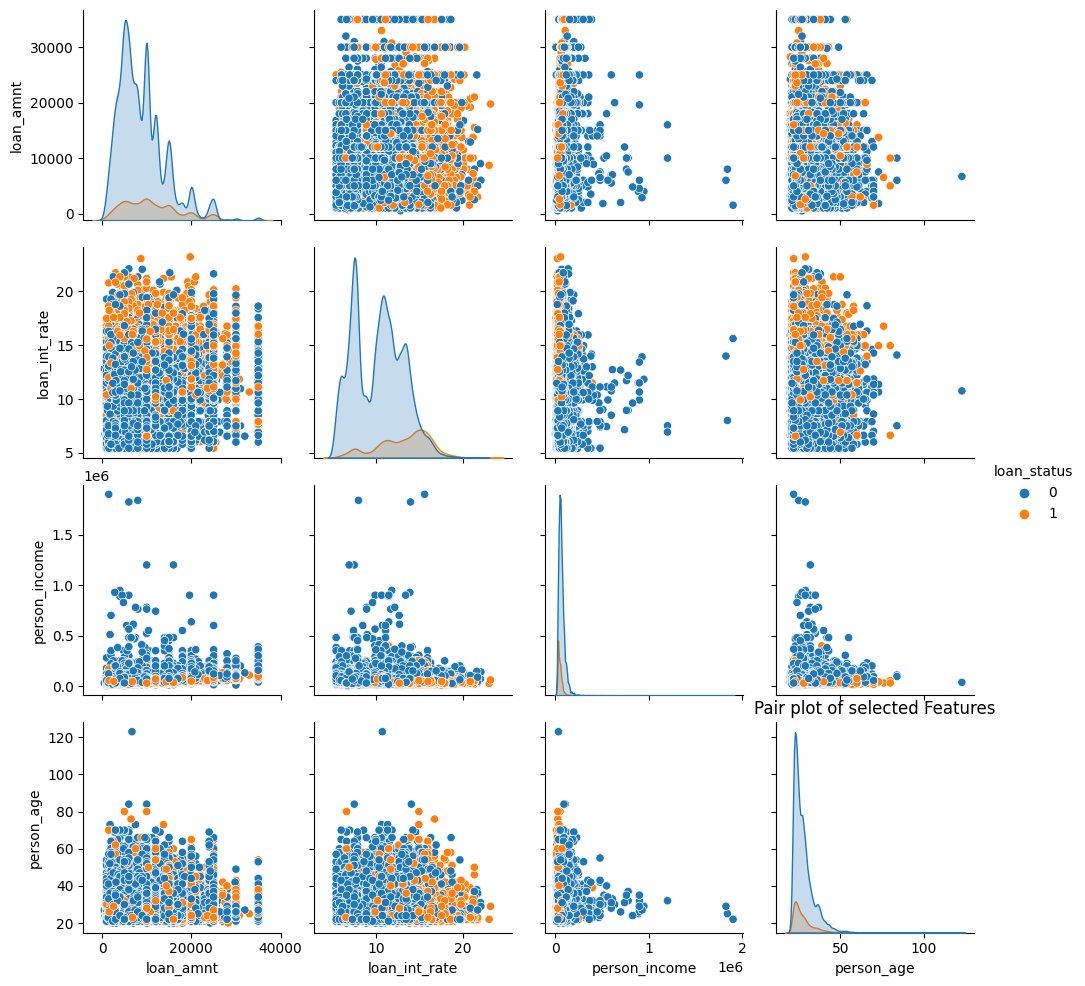

In [21]:
subset_features = ['loan_amnt','loan_int_rate','person_income','person_age','loan_status']
sns.pairplot(df_loan[subset_features],hue='loan_status')
plt.title('Pair plot of selected Features')
plt.show()

In [22]:
df_loan_test = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [23]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_loan, df_loan_test)

In [24]:
df_train = df_train_processed
df_test = df_test_processed

In [25]:
df_train.shape,df_test.shape

((58645, 17), (39098, 16))

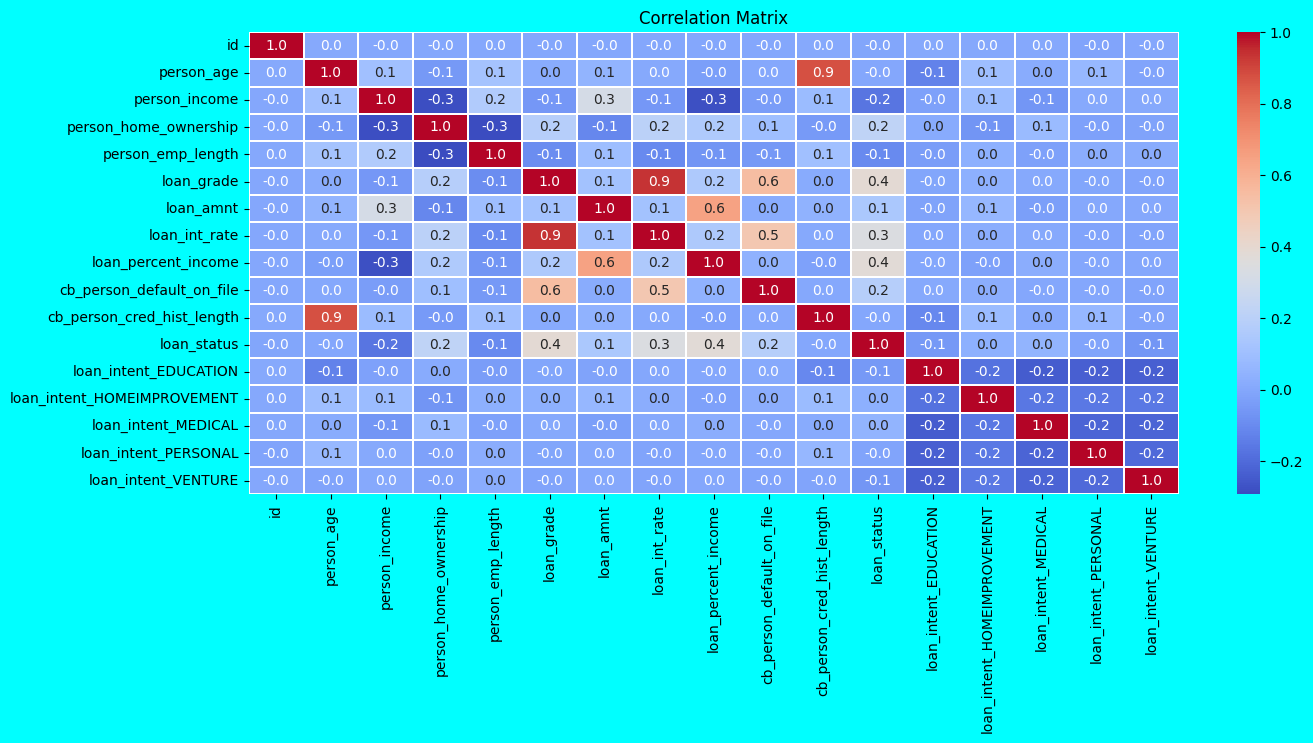

In [26]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')  
plt.title('Correlation Matrix')
plt.show()

In [27]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [29]:
pip install tabgan==1.3.3

Note: you may need to restart the kernel to use updated packages.


In [30]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,  
    'feature_fraction': 0.6236144085285287, 
    'bagging_fraction': 0.9596685778433888, 
    'bagging_freq': 3,  
    'verbose': -1
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]    
   
    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc')    

    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]   
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val    
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits


In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [32]:
catboost_params = {
    'depth': 5,
    'learning_rate': 0.19893301995319765,
    'bagging_temperature': 0.7979373495258176,
    'l2_leaf_reg': 5,
    'loss_function': 'CrossEntropy',
    'iterations': 300,
    'grow_policy': 'Lossguide',
    'eval_metric': 'AUC',
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(skf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)
    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=True)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1]  
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]  
    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val    
    catboost_test_predictions += catboost_fold_test_preds / n_splits


0:	test: 0.8529993	best: 0.8529993 (0)	total: 77.1ms	remaining: 23.1s
1:	test: 0.8713187	best: 0.8713187 (1)	total: 97.5ms	remaining: 14.5s
2:	test: 0.8948350	best: 0.8948350 (2)	total: 118ms	remaining: 11.6s
3:	test: 0.9052491	best: 0.9052491 (3)	total: 137ms	remaining: 10.2s
4:	test: 0.9079375	best: 0.9079375 (4)	total: 157ms	remaining: 9.24s
5:	test: 0.9148556	best: 0.9148556 (5)	total: 177ms	remaining: 8.65s
6:	test: 0.9162687	best: 0.9162687 (6)	total: 196ms	remaining: 8.21s
7:	test: 0.9176259	best: 0.9176259 (7)	total: 216ms	remaining: 7.88s
8:	test: 0.9195234	best: 0.9195234 (8)	total: 235ms	remaining: 7.6s
9:	test: 0.9204499	best: 0.9204499 (9)	total: 254ms	remaining: 7.37s
10:	test: 0.9233552	best: 0.9233552 (10)	total: 274ms	remaining: 7.19s
11:	test: 0.9237629	best: 0.9237629 (11)	total: 296ms	remaining: 7.1s
12:	test: 0.9257807	best: 0.9257807 (12)	total: 315ms	remaining: 6.96s
13:	test: 0.9263609	best: 0.9263609 (13)	total: 335ms	remaining: 6.84s
14:	test: 0.9267043	best: 

In [33]:
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

In [34]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(df_train.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_train.head()

DataFrame after replacing inf with column means:


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,37,35000,3,0.0,1,6000,11.49,0.17,0,14,True,False,False,False,False
1,1,22,56000,2,6.0,2,4000,13.35,0.07,0,2,False,False,True,False,False
2,2,29,28800,2,8.0,0,6000,8.90,0.21,0,10,False,False,False,True,False
3,3,30,70000,3,14.0,1,12000,11.11,0.17,0,5,False,False,False,False,True
4,4,22,60000,3,2.0,0,6000,6.92,0.10,0,3,False,False,True,False,False


In [35]:
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
print("DataFrame after replacing inf with column means:")
df_test.head()

DataFrame after replacing inf with column means:


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,58645,23,69000,3,3.0,5,25000,15.76,0.36,0,2,False,True,False,False,False
1,58646,26,96000,0,6.0,2,10000,12.68,0.10,1,4,False,False,False,True,False
2,58647,26,30000,3,5.0,4,4000,17.19,0.13,1,2,False,False,False,False,True
3,58648,33,50000,3,4.0,0,7000,8.90,0.14,0,7,False,False,False,False,False
4,58649,26,102000,0,8.0,3,15000,16.32,0.15,1,4,False,True,False,False,False


In [36]:
df_sub['loan_status'] = lgbm_test_predictions*0.2 + catboost_test_predictions*0.8

In [37]:
df_sub.to_csv('submission.csv', index=False)
